In this exercise we are going to use Boston Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
%matplotlib inline

This data frame contains the following columns:
#### crim
per capita crime rate by town 
#### zn
proportion of residential land zoned for lots over 25,000 sq.ft. 
#### indus
proportion of non-retail business acres per town 
#### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
#### nox
nitrogen oxides concentration (parts per 10 million) 
#### rm
average number of rooms per dwelling 
#### age
proportion of owner-occupied units built prior to 1940 
#### dis
weighted mean of distances to five Boston employment centres 
#### rad
index of accessibility to radial highways 
#### tax
full-value property-tax rate per 10,000 dollars
#### ptratio
pupil-teacher ratio by town 
#### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
#### lstat
lower status of the population (percent) 
#### medv
median value of owner-occupied homes in 1000 dollars

In [2]:
url = "../Data/Boston.csv"
BostonData = pd.read_csv(url)
del BostonData['Unnamed: 0']
BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4


In [3]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

#### Our goal is to predict medvCategory based on 'rm', 'ptratio' and 'lstat'

#### First standardize your input (X) variables - put standardized values in new variables 'rm_st' , 'ptraio_st' and 'lstat_st'

In [4]:
def st(x):
    return (x-x.min())/(x.max()-x.min())

In [6]:
for d in ['rm','ptratio','lstat']:
    BostonData[d+'_st'] = st(BostonData[d])

In [8]:
BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory,rm_st,ptratio_st,lstat_st
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3,0.577505,0.287234,0.089680
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3,0.547998,0.553191,0.204470
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4,0.694386,0.553191,0.063466
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4,0.658555,0.648936,0.033389
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4,0.687105,0.648936,0.099338


#### Run a KNN classifier with 5 nearest neighbors and report your misclassification error. set weights to uniform

In [9]:
from sklearn import neighbors, metrics

In [13]:
x = BostonData[['rm_st','ptratio_st','lstat_st']]
y = BostonData['medvCategory']
knn = neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [15]:
score = knn.score(x,y)
error = 1-score
print "score:",score
print "error:",error

score: 0.786561264822
error: 0.213438735178


Is this error reliable?

Answer: Ish.

#### Now use 10-fold cross-validation to choose the most efficient K (number of neighbors)

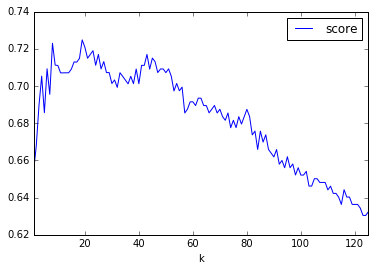

In [42]:
kf = cross_validation.KFold(n_folds=10,n=len(BostonData),shuffle=True)
k_range = range(1,len(BostonData)/4)
overall_score = []
for k in k_range:
    score = []
    knn_ = neighbors.KNeighborsClassifier(n_neighbors=k,weights='uniform')
    for train_index, test_index in kf:        
        knn_.fit(x.iloc[train_index],y.iloc[train_index])
        score.append(knn_.score(x.iloc[test_index],y.iloc[test_index])) # Why not predict?
    overall_score.append(np.mean(score))

score_df = pd.DataFrame({
        'k':k_range,
        'score':overall_score
    })
score_df.plot(x='k',y='score')

In [49]:
score_df.idxmax()

k        124
score     18
dtype: int64

 Explain your findings: The optimal `k` is about 19, based on the graph.

#### Train your algorithm with the optimal K you found above (don't worry if it changes from time to time - if that is the case use the one that is usually the best). After training your model with that K, Use it to predict the class of a neighborhood with rm =2, lstat = 3.5 and ptratio of 19. 

In [48]:
# We shall standardize our input first!
x = BostonData[['rm_st','ptratio_st','lstat_st']]
y = BostonData['medvCategory']
knn = neighbors.KNeighborsClassifier(n_neighbors=18,weights='uniform')
knn.fit(x,y)
score = knn.score(x,y)
error = 1-score
print "score:",score
print "error:",error

score: 0.749011857708
error: 0.250988142292


In [56]:
def st_p(x,X):
    return (x-BostonData[X].min())/(BostonData[X].max()-BostonData[X].min())

print knn.predict([[st_p(2,'rm'),st_p(3.5,'lstat'),st_p(19,'ptratio')]])

['2']


# Now let's run a KNN-regression model to predict MEDV of the same point